In [0]:
import osmnx as ox
import folium

In [5]:
def extract_munich_graph():
    # Define the place
    place = "Munich, Germany"

    # Extract the graph for the specified place
    graph = ox.graph_from_place(place, network_type='all')

    # Save the graph to a file or process it further
    # For example, to save as GraphML
    ox.save_graphml(graph, filepath="data/munich_street_network.graphml")

    return graph

def read_munich_map():
    graph = ox.load_graphml("../data/munich_street_network.graphml")
    return graph

# Extract and process the graph
munich_graph = read_munich_map()

In [6]:
import networkx as nx
import matplotlib.pyplot as plt

In [7]:
x_pos = dict(munich_graph.nodes(data="x"))
y_pos = dict(munich_graph.nodes(data="y"))
pos = {key: (x_pos[key], y_pos[key]) for key in x_pos.keys()}

In [8]:
munich_graph.number_of_nodes()

141003

In [9]:
munich_graph.number_of_edges()

368110

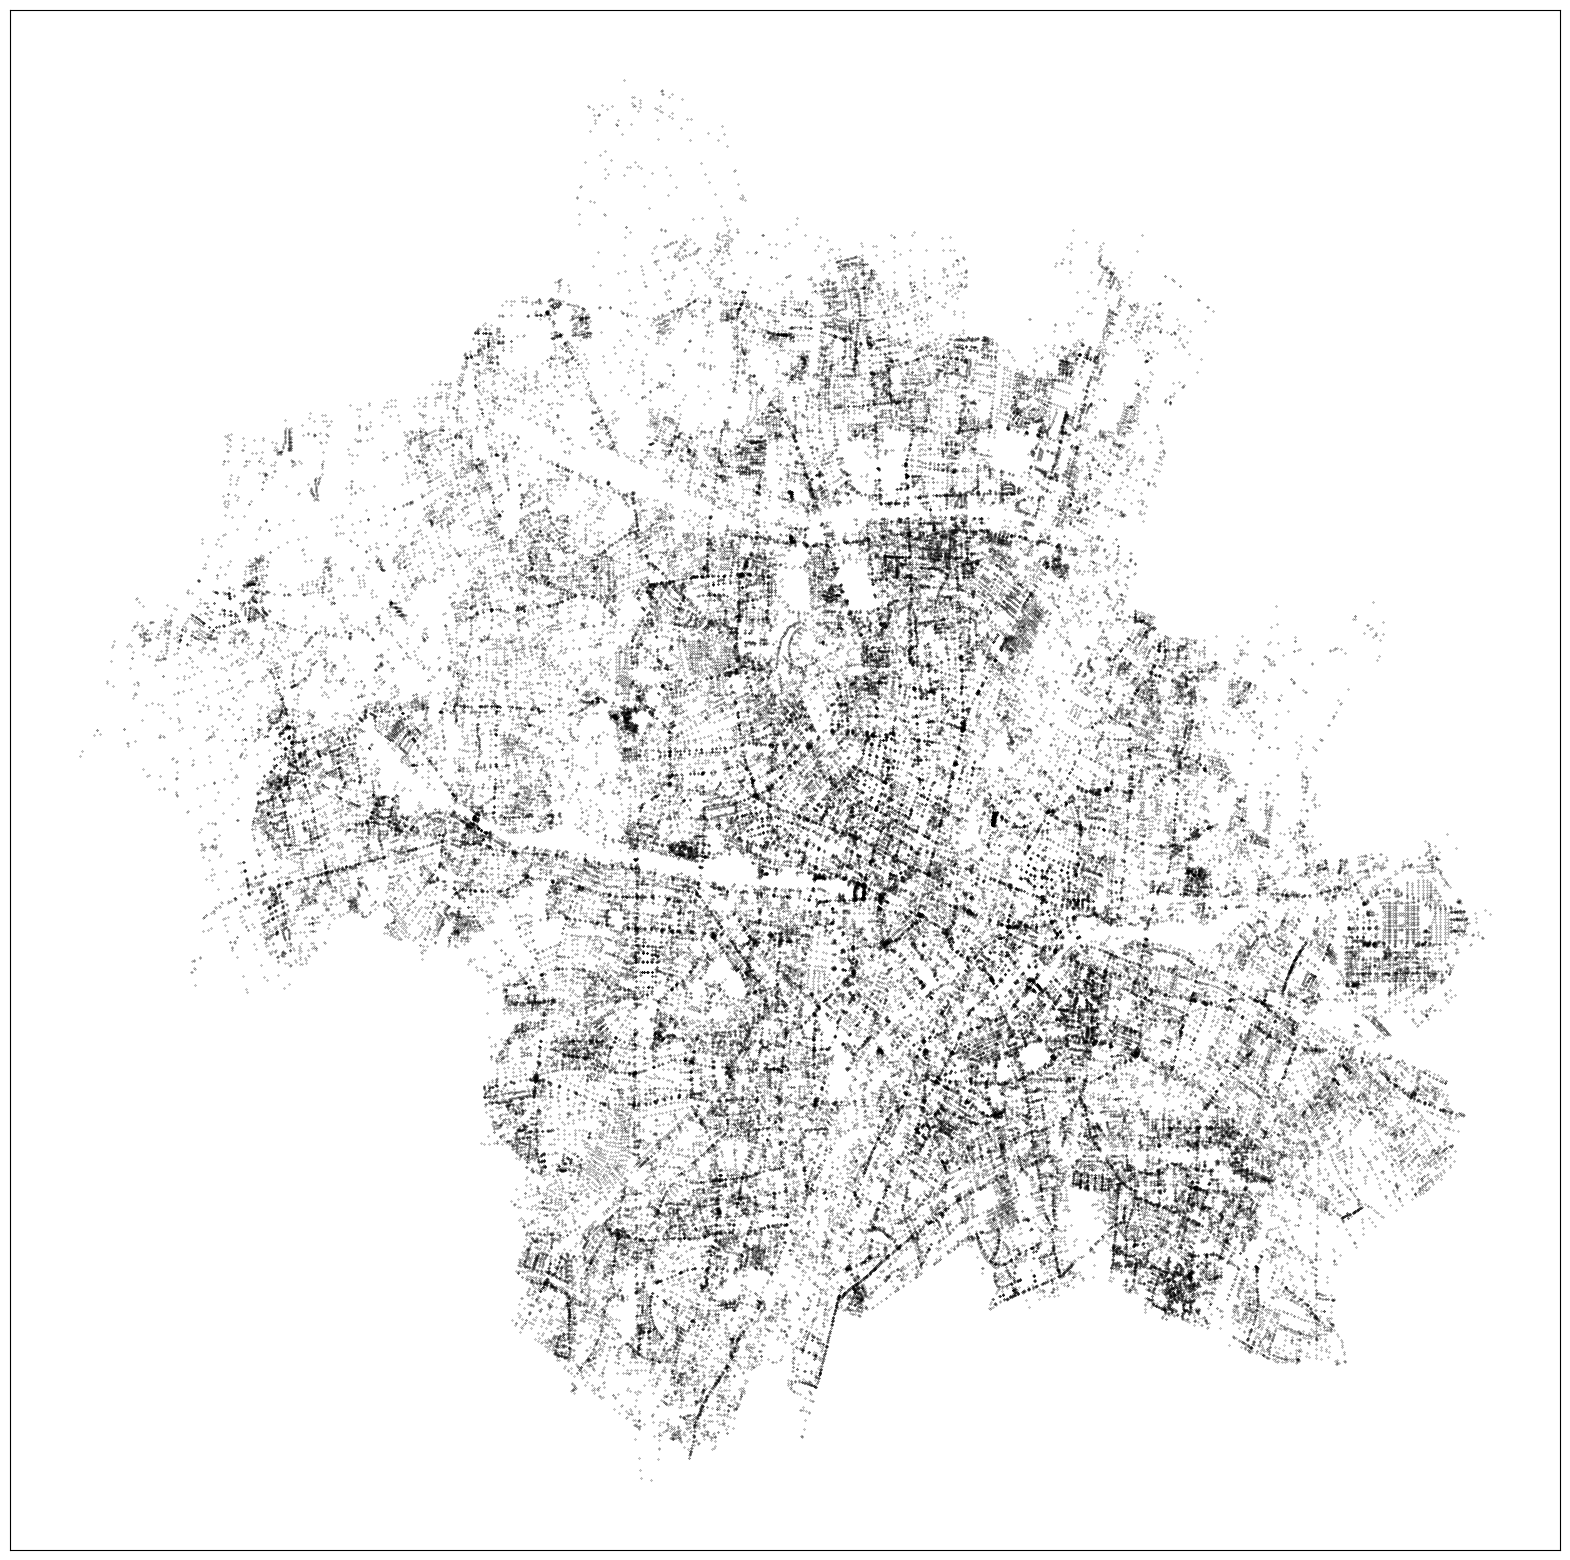

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
nx.draw_networkx_nodes(munich_graph, pos, node_size=0.05, node_color='k', ax=ax)
plt.show()

In [3]:
import osmnx as ox
import folium

def plot_munich_graph(graph):
    # Convert the graph to GeoDataFrames
    nodes, edges = ox.graph_to_gdfs(graph)

    # Create a map centered around Munich
    munich_map = folium.Map(location=[48.137154, 11.576124], zoom_start=12)

    # Plot each node on the map
    for idx, row in nodes.iterrows():
        folium.CircleMarker(location=[row['y'], row['x']], radius=2, color='blue').add_to(munich_map)

    # Plot each edge (route) on the map
    for idx, row in edges.iterrows():
        # Define the line geometry, ensure it's a LineString
        if row.geometry.geom_type == 'LineString':
            points = list(row.geometry.coords)
        else:  # it's a MultiLineString
            points = list(row.geometry[0].coords)

        # Convert coordinates to a format folium understands
        folium_line = [(point[1], point[0]) for point in points]
        
        # Add the line to the map
        folium.PolyLine(folium_line, color="red", weight=2).add_to(munich_map)

    return munich_map

# Extract the graph for Munich
place = "Munich, Germany"

# Create the map with nodes and routes
munich_map = plot_munich_graph(munich_graph)

# To display the map in a Jupyter notebook, you would use
munich_map


KeyboardInterrupt: 